# Modèles Linéaires

In [1]:
import CLibrary as CLib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
    X = [
        0, 0,
        1, 2,
        1, 0,
        0, 1,
        2, 2,
        2, 1,
        0.25, 0.25,
        0.1, 0.1,
        0.15, 0.15,
        0.3, 0.3,
        3, 3,
        1.5, 1.5,
        2.5, 2.5
    ]

    Y = [-1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1]

    inputCountPerSample = int(len(X) / len(Y))    

### Classification (Rosenblatt)

In [3]:
modelClassif = CLib.create_linear_model(inputCountPerSample)
trainedModelClassif = CLib.fit_classification(modelClassif, X, Y, 0.001, 5000)

CLib.launchClassificationText(trainedModelClassif, [0.25, 0.25], -1)
CLib.launchClassificationText(trainedModelClassif, [2.5, 2.5], 1)
CLib.launchClassificationText(trainedModelClassif, [1, 2], 1)
CLib.launchClassificationText(trainedModelClassif, [0.3, 0.3], -1)
CLib.launchClassificationText(trainedModelClassif, [3, 3], 1)

- Prediction des points [0.25, 0.25]  :  (-1) -> (-1)
- Prediction des points [2.5, 2.5]  :  (1) -> (1)
- Prediction des points [1, 2]  :  (1) -> (1)
- Prediction des points [0.3, 0.3]  :  (-1) -> (-1)
- Prediction des points [3, 3]  :  (1) -> (1)


### Regression

In [4]:
modelReg = CLib.create_linear_model(inputCountPerSample)
trainedModelReg = CLib.fit_regression(modelReg, X, Y)

CLib.launchRegressionText(trainedModelReg, [0, 0], -1)
CLib.launchRegressionText(trainedModelReg, [2.5, 2.5], 1)
CLib.launchRegressionText(trainedModelReg, [1.5, 1.5], 1)
CLib.launchRegressionText(trainedModelReg, [0.3, 0.3], -1)
CLib.launchRegressionText(trainedModelReg, [3, 3], 1)

- Prediction des points [0, 0]  :  (-1) -> (-1)
- Prediction des points [2.5, 2.5]  :  (1) -> (1)
- Prediction des points [1.5, 1.5]  :  (1) -> (1)
- Prediction des points [0.3, 0.3]  :  (-1) -> (-1)
- Prediction des points [3, 3]  :  (1) -> (1)


### Affichage

In [5]:
def draw_2d(model, X, Y, name):
    max_x = math.ceil(max(x[0] for x in X))
    max_y = math.ceil(max(x[1] for x in X))
    
    min_x = math.floor(min(x[0] for x in X))
    min_y = math.floor(min(x[1] for x in X))    

    # DISPLAY
    XToPredict = [
        [i / 100.0, j / 100.0]
        for i in range(min_x * 100, max_x * 100) for j in range(min_y * 100, max_y * 100)
    ]
    
    
    YPredicted = [
        getattr(CLib, name)(model, x) for x in XToPredict
    ]

    XToPlotUnHappy = []
    XToPlotHappy = []
    for i, val in enumerate(YPredicted):
        if val >= 0:
            XToPlotHappy.append(XToPredict[i])
        else:
            XToPlotUnHappy.append(XToPredict[i])

    def get(i, l):
        return [z[i] for z in l]

    plt.scatter(
        get(0, XToPlotUnHappy),
        get(1, XToPlotUnHappy),
        color="yellow"
    )
    plt.scatter(
        get(0, XToPlotHappy),
        get(1, XToPlotHappy),
        color="violet"
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] == -1]),
        get(1, [x for j, x in enumerate(X) if Y[j] == -1]),
        color='red'
    )
    plt.scatter(
        get(0, [x for j, x in enumerate(X) if Y[j] != -1]),
        get(1, [x for j, x in enumerate(X) if Y[j] != -1]),
        color='blue'
    )
    plt.show()
    plt.clf()

#### Affichage Classification

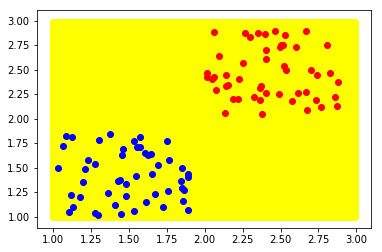

<Figure size 432x288 with 0 Axes>

In [8]:
X = np.concatenate([np.random.random((50, 2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0]).flatten()

XF = X.flatten().tolist()
YF = Y.tolist()

trainedModelClassif = CLib.fit_classification(
    modelClassif, 
    XF, 
    YF, 
    0.001, 
    5000
)

draw_2d(trainedModelClassif, X, Y, 'predict_classification')

#### Affichage Regression

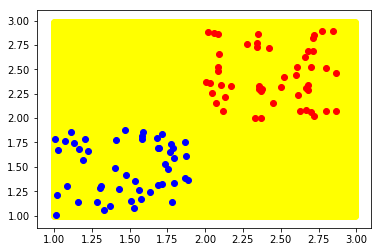

<Figure size 432x288 with 0 Axes>

In [10]:
X = np.concatenate([np.random.random((50, 2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0]).flatten()

XF = X.flatten().tolist()
YF = Y.tolist()

trainedModelReg = CLib.fit_regression(
    modelReg, 
    XF, 
    YF
)

draw_2d(trainedModelReg, X, Y, 'predict_regression')